<a href="https://colab.research.google.com/github/hemanth714444/2203A52192_DAUP/blob/main/2203A52192_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
import pandas as pd
import numpy as np
import io
import requests
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
import matplotlib.pyplot as plt



In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)
data.rename(columns={"Temp": "Temperature"}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.info())
print(data.head())
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)
key_statistics = data.describe()
print("Key statistics:\n", key_statistics)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB
None
            Temperature
Date                   
1981-01-01         20.7
1981-01-02         17.9
1981-01-03         18.8
1981-01-04         14.6
1981-01-05         15.8
Missing values:
 Temperature    0
dtype: int64
Key statistics:
        Temperature
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000


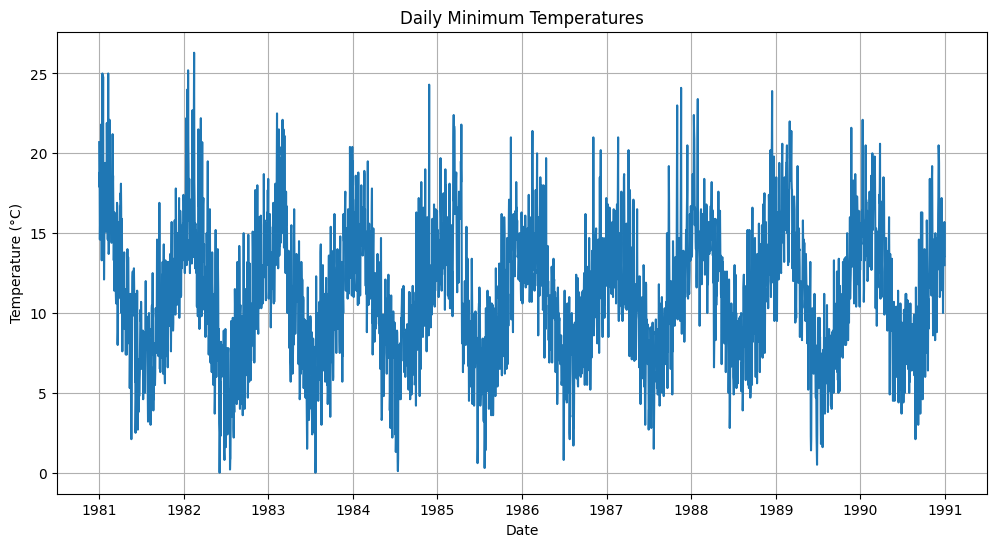

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['Temperature'])
plt.title('Daily Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


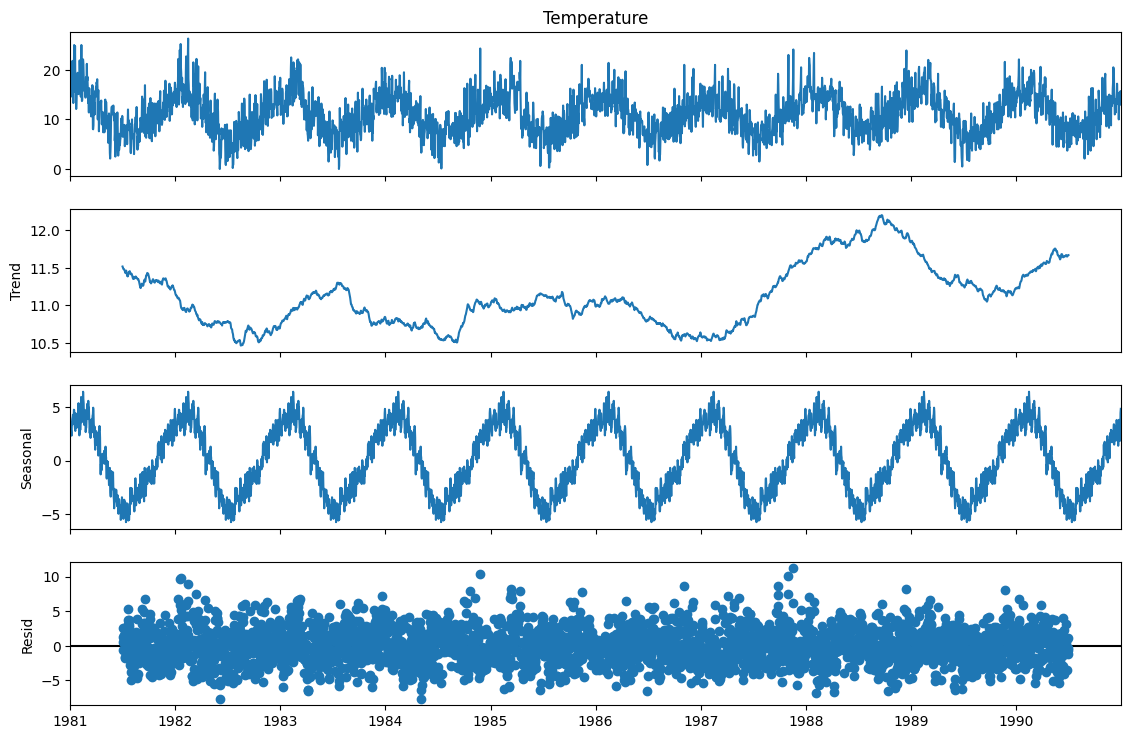

Seasonal Component Example:
 Date
1981-01-01    4.202612
1981-01-02    3.880025
1981-01-03    3.124256
1981-01-04    2.868122
1981-01-05    2.524804
Name: seasonal, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 2.66
RMSE: 3.35


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [4]:
decomposition = seasonal_decompose(data['Temperature'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()
print("Seasonal Component Example:\n", decomposition.seasonal.head())
series = data['Temperature']
split_point = int(len(series) * 0.8)
train, test = series[:split_point], series[split_point:]
# Removed stl=stl, added period=365
stlf = STLForecast(train, model=ARIMA, model_kwargs={"order": (1, 1, 1)}, period=365)
stlf_res = stlf.fit()
forecast = stlf_res.forecast(steps=len(test))
mae = mean_absolute_error(test, forecast)
rmse = sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")